# RED BELT

import what we need in the cell below 

In [29]:
import yfinance as yf
from pandas_datareader import data as pdr
import pandas as pd
from datetime import datetime
import numpy as np 
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import cufflinks as cf
cf.set_config_file(offline=True)
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
yf.pdr_override()

Use Python’s Yfinance Package to import the last ten
(10) years of daily price data (the Open and the Close
Prices for each day) for at least five (5) stocks of your
choice. BE SURE THE STOCKS YOU CHOOSE HAVE
THIS DATA AVAILABLE FOR ALL OF THE NORMAL
TRADING DAYS IN THE LAST TEN (10) YEARS!

In [30]:
df_WMT = pdr.get_data_yahoo('WMT','2011-11-18','2021-11-18')[['Open','Close']]#Walmart Inc.
df_WMT = df_WMT.rename(columns ={'Open':'Open_WMT','Close':'Close_WMT'})

df_JPM = pdr.get_data_yahoo('JPM','2011-11-18','2021-11-18')[['Open','Close']]#JPMorgan Chase & Co.
df_JPM = df_JPM.rename(columns ={'Open':'Open_JPM','Close':'Close_JPM'})

df_AMZN = pdr.get_data_yahoo('AMZN','2011-11-18','2021-11-18')[['Open','Close']]#Amazon.com, Inc
df_AMZN =df_AMZN.rename(columns ={'Open':'Open_AMZN','Close':'Close_AMZN'})

df_SONY = pdr.get_data_yahoo('SONY','2011-11-18','2021-11-18')[['Open','Close']]#Sony Group Corporation
df_SONY =df_SONY.rename(columns ={'Open':'Open_SONY','Close':'Close_SONY'})

df_EA = pdr.get_data_yahoo('EA','2011-11-18','2021-11-18')[['Open','Close']]#Electronic Arts Inc.
df_EA =df_EA.rename(columns ={'Open':'Open_EA','Close':'Close_EA'})






[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Join the individual tables containing the price data for
the individual stocks into a single data table indexed
by date. 

In [31]:
df=df_EA.merge(df_SONY, on = 'Date')
df=df.merge(df_AMZN, on = 'Date')
df=df.merge(df_JPM, on = 'Date')
df=df.merge(df_WMT, on ='Date')
df1=df.copy()
df1



,Open_EA,Close_EA,Open_SONY,Close_SONY,Open_AMZN,Close_AMZN,Open_JPM,Close_JPM,Open_WMT,Close_WMT
Date,,,,,,,,,,
2011-11-17,22.959999,22.320000,17.120001,16.799999,212.509995,204.520004,31.400000,30.490000,56.540001,56.730000
2011-11-18,22.450001,21.990000,16.990000,16.910000,205.330002,197.139999,30.670000,30.620001,57.029999,57.230000
2011-11-21,21.559999,21.629999,16.510000,16.280001,193.289993,189.250000,30.020000,29.910000,56.930000,56.660000
2011-11-22,21.570000,21.860001,16.760000,16.570000,186.949997,192.339996,29.900000,29.410000,56.560001,56.849998
2011-11-23,21.580000,20.940001,16.469999,16.270000,193.059998,188.990005,29.110001,28.379999,56.650002,56.639999
...,...,...,...,...,...,...,...,...,...,...
2021-11-11,140.149994,144.449997,122.080002,121.000000,3513.000000,3472.500000,167.520004,167.610001,148.770004,148.500000
2021-11-12,143.860001,145.440002,122.269997,122.900002,3485.000000,3525.149902,167.649994,166.860001,149.000000,147.759995
2021-11-15,143.610001,141.279999,123.500000,122.949997,3537.000000,3545.679932,167.210007,166.559998,148.149994,146.910004


Slice off the first three (3) years of daily price data.
Retain the Close Prices and convert them into daily
return values. Drop any NaN’s as needed. YOU MAY
NEED TO CONVERT THIS DATAFRAME INTO A MATRIX
AND THEN TRANSPOSE IT IN ORDER TO RUN ALL OF
YOUR CODE. BE SURE TO KEEP THE OTHER SEVEN (7)
YEARS OF DAILY PRICE DATA AROUND FOR LATER
USE!


In [32]:
three_years_df =  df1.loc['2011-11-17':'2014-11-17']
seven_years_df = df1['2014-11-17':]




In [33]:
three_years_df = three_years_df[['Close_WMT','Close_JPM','Close_AMZN','Close_SONY','Close_EA']]
three_years_df ['Return_WMT'] = three_years_df['Close_WMT'].pct_change()
three_years_df ['Return_JPM'] = three_years_df['Close_JPM'].pct_change()
three_years_df ['Return_AMZN'] = three_years_df['Close_AMZN'].pct_change()
three_years_df ['Return_SONY'] = three_years_df['Close_SONY'].pct_change()
three_years_df ['Return_EA'] = three_years_df['Close_EA'].pct_change()
three_years_df = three_years_df[['Return_WMT','Return_JPM','Return_AMZN','Return_SONY','Return_EA']]
three_years_df = three_years_df.dropna()
three_years_df

,Return_WMT,Return_JPM,Return_AMZN,Return_SONY,Return_EA
Date,,,,,
2011-11-18,0.008814,0.004264,-0.036085,0.006548,-0.014785
2011-11-21,-0.009960,-0.023187,-0.040022,-0.037256,-0.016371
2011-11-22,0.003353,-0.016717,0.016328,0.017813,0.010633
2011-11-23,-0.003694,-0.035022,-0.017417,-0.018105,-0.042086
2011-11-25,0.004414,0.003524,-0.034870,0.042409,-0.005253
...,...,...,...,...,...
2014-11-11,-0.005413,-0.009042,0.022615,0.010244,-0.002908
2014-11-12,0.002405,-0.013199,-0.001603,-0.003863,0.001458
2014-11-13,0.047222,-0.005449,0.015955,-0.010664,0.006068


In [34]:
matrix_of_return_values = np.asmatrix(three_years_df)
matrix_of_return_values = matrix_of_return_values.T

Generate at least ten thousand (10,000) different
vectors of weights (percentages), each of whose sum
is one (1) and each of whose length is equal to your
number of stocks. This is the same as asking you to
simulate at least ten thousand (10,000) different
portfolio allocations as each of the ten thousand
(10,000) different vectors corresponds to a unique
portfolio allocation possibility.

In [35]:
no_of_asset_classes = 5
no_of_portfolios = 10000
collection_of_random_asset_weights = []
portfolio_means = []
portfolio_standard_deviations = []
portfolio_sharpe_ratios = []

Calculate the overall portfolio mean, the overall
portfolio standard deviation, and the Sharpe ratio of
each of the portfolio allocation possibilities obtained
in the previous step. You may assume a risk-free
return rate of zero percent (0%). BE SURE TO
CAREFULLY KEEP TRACK OF AND REMEMBER ALL OF
THE DIFFERENT VALUES THAT YOU ARE
CALCULATING!

In [36]:

def get_random_asset_weights(no_of_asset_classes):
    random_asset_weights = np.random.rand(no_of_asset_classes)
    random_asset_weights /= sum(random_asset_weights)  
    random_asset_weights = np.asmatrix(random_asset_weights)  
    return random_asset_weights    


def get_portfolio_statistics(asset_weights, matrix_of_return_values): 
    asset_means = np.asmatrix(np.mean(matrix_of_return_values, axis = 1))
    asset_covariances = np.asmatrix(np.cov(matrix_of_return_values))
    portfolio_mean = asset_weights * asset_means
    portfolio_mean = portfolio_mean.item()
    portfolio_standard_deviation =np.sqrt(asset_weights * asset_covariances * asset_weights.T) 
    portfolio_standard_deviation = portfolio_standard_deviation.item()
    portfolio_sharpe_ratio = portfolio_mean /portfolio_standard_deviation 
    return portfolio_mean, portfolio_standard_deviation, portfolio_sharpe_ratio


while len(collection_of_random_asset_weights) < no_of_portfolios:
    random_asset_weights = get_random_asset_weights(no_of_asset_classes)
    collection_of_random_asset_weights.append(random_asset_weights) 
    A,B,C=get_portfolio_statistics(random_asset_weights,matrix_of_return_values)
    portfolio_means.append(A)
    portfolio_standard_deviations.append(B)
    portfolio_sharpe_ratios.append(C)

for test

In [37]:
#portfolio_means
#portfolio_standard_deviations
#portfolio_sharpe_ratios

In [38]:
index = portfolio_sharpe_ratios.index(max(portfolio_sharpe_ratios))
collection_of_random_asset_weights[index]



matrix([[0.49602311, 0.26782846, 0.09810655, 0.00446296, 0.13357892]])

Determine which vector of asset weights
(percentages) results in the portfolio allocation
possibility of highest Sharpe ratio. Create a Pandas
DataFrame with a single row containing these asset
weights (percentages) in which the columns are
labeled with the asset names and the row has index
equal to the last date represented in the dataset you
used to perform the portfolio optimization.


In [39]:
collec=collection_of_random_asset_weights[index]
some_weights =pd.DataFrame({'WMT':[collec[0,0]],'JPM':[collec[0,1]],'AMZN':[collec[0,2]],'SONY':[collec[0,3]],'EA':[collec[0,4]]},index=[three_years_df.last_valid_index()])
some_weights





,WMT,JPM,AMZN,SONY,EA
2014-11-17,0.496023,0.267828,0.098107,0.004463,0.133579


Make a scatterplot showing the corresponding
values (x, y) of the overall portfolio standard
deviation and overall portfolio mean for each of your
portfolio allocation possibilities.

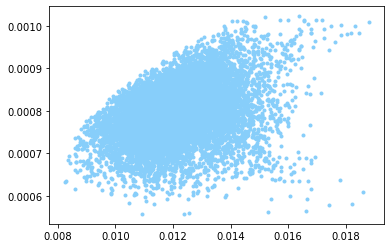

In [40]:
plt.plot(portfolio_standard_deviations, portfolio_means, 'o', markersize = 3, color = 'lightskyblue') 
plt.show()


#we can add the CML by using this code

#plt.plot(x, y, '-', linewidth = 2, color = 'green')
#plt.plot(portfolio_standard_deviations[index],portfolio_means[index],color='r',marker='o')
#plt.show() 

Report the maximum value of Sharpe ratio achieved 
by any of your portfolio allocation possibilities. (This 
is the value of the Sharpe ratio corresponding to the 
vector of asset weights [percentages] you found 
while completing the task in the fifth bullet point 
above.

In [41]:
print(index)
print(f'maximum value of Sharpe ratio',portfolio_sharpe_ratios[index])

8747
maximum value of Sharpe ratio 0.0863708867982588


# BLACK BELT
### Part 1. Your portfolio as an asset
Using your portfolio weights, combine weights into a 
single portfolio fund. Using prices open and closes 
from your Y-finance data “mark-to-market” at the 
Open and Close. Give your fund a ticker symbol of 
your choosing.

In [42]:
capital = 10000
allocations = capital*some_weights
allocations.index.name='Date'
no_of_shares= allocations 
no_of_shares

,WMT,JPM,AMZN,SONY,EA
Date,,,,,
2014-11-17,4960.231083,2678.284592,981.065536,44.629611,1335.789177


In [63]:
no_of_shares_Close= allocations / df1[[f'Close_{sym}'for sym in some_weights.columns]].loc[some_weights.last_valid_index()].values
no_of_shares_Open = allocations / df1[[f'Open_{sym}'for sym in some_weights.columns]].loc[some_weights.last_valid_index()].values

print(f'Weightings',some_weights,"\n")
print(f'Open',no_of_shares_Open,"\n")
print(f'Close',no_of_shares_Close,"\n")
print(f'Dollar amounts',allocations)


Weightings                  WMT       JPM      AMZN      SONY        EA
Date                                                        
2014-11-17  0.496023  0.267828  0.098107  0.004463  0.133579 

Open                   WMT        JPM      AMZN      SONY         EA
Date                                                           
2014-11-17  60.065766  44.638077  3.005347  2.210481  32.265438 

Close                   WMT        JPM      AMZN      SONY         EA
Date                                                           
2014-11-17  59.354207  44.357147  3.036885  2.202844  32.265438 

Dollar amounts                     WMT          JPM        AMZN       SONY           EA
Date                                                                    
2014-11-17  4960.231083  2678.284592  981.065536  44.629611  1335.789177


### Part 1. Your portfolio as an asset

 in your notebook, display your portfolio-fund as a 
 single instrument for grader to evaluate. It should 
 only have the columns Open and Close; and for an 
 index it should have the all the dates after the 
 portfolio optimization activities from your Red Belt

In [44]:
seven_years_df 
seven_years_df['Kali_Open']= seven_years_df['Open_WMT']*no_of_shares_Open ['WMT'].iloc[0]+seven_years_df['Open_JPM']*no_of_shares_Open['JPM'].iloc[0]+seven_years_df['Open_AMZN']*no_of_shares_Open['AMZN'].iloc[0]+seven_years_df['Open_SONY']*no_of_shares_Open['SONY'].iloc[0]+seven_years_df['Open_EA']*no_of_shares_Open['EA'].iloc[0]
seven_years_df['Kali_Close']= seven_years_df['Close_WMT']*no_of_shares_Close ['WMT'].iloc[0]+seven_years_df['Close_JPM']*no_of_shares_Close['JPM'].iloc[0]+seven_years_df['Close_AMZN']*no_of_shares_Close['AMZN'].iloc[0]+seven_years_df['Close_SONY']*no_of_shares_Close['SONY'].iloc[0]+seven_years_df['Close_EA']*no_of_shares_Close['EA'].iloc[0]
seven_years_df = seven_years_df[['Kali_Open','Kali_Close']]

seven_years_df

,Kali_Open,Kali_Close
Date,,
2014-11-17,10000.000000,10000.000000
2014-11-18,10079.127689,10075.053780
2014-11-19,10154.411634,10171.995799
2014-11-20,10195.952495,10128.110392
2014-11-21,10315.808042,10166.217202
...,...,...
2021-11-11,31763.396098,31721.669522
2021-11-12,31818.988705,31840.499267
2021-11-15,31899.222848,31704.974577


 
## Print the Absolute Return, Compound Annual Growth 
 ## Rate, and Information Ratio for your fund.

In [45]:
last_Close = seven_years_df['Kali_Close'].iloc[-1]
years = seven_years_df.shape[0]/252


absolute_return = ((last_Close-capital)/capital)*100


CAGR = (((last_Close/capital)**(1/years))-1)*100




information_ratio = (seven_years_df['Kali_Close'].pct_change().mean()/seven_years_df['Kali_Close'].pct_change().std())*((years) **0.5)

print(f'Absolute Return of our Portfolio = ',absolute_return,"%\n")
print(f'CAGR of our Portfolio = ',CAGR,"%\n")
print(f'Information Ratio of our Portfolio = ',(information_ratio),"\n")



seven_years_df['Kali_Close'].iplot()


Absolute Return of our Portfolio =  212.28866682716418 %

CAGR of our Portfolio =  17.665972642549388 %

Information Ratio of our Portfolio =  0.16399408253101552 



##  Part 2   
## Building a simplified tradeable 
 ## forecasting model


## Create labels for predicting next day close as +1.0 for an increase, -1.0 for a decrease.
(this step in Part 2 Continued )

##  Apply the following transforms to generate some mildly predictive features:

### One short moving average
### One longer moving average
### The long minus the short moving averages
### The one-day diff on the open.
### Or any others you feel make sense as alternative or additions.


In [46]:
seven_years_df

,Kali_Open,Kali_Close
Date,,
2014-11-17,10000.000000,10000.000000
2014-11-18,10079.127689,10075.053780
2014-11-19,10154.411634,10171.995799
2014-11-20,10195.952495,10128.110392
2014-11-21,10315.808042,10166.217202
...,...,...
2021-11-11,31763.396098,31721.669522
2021-11-12,31818.988705,31840.499267
2021-11-15,31899.222848,31704.974577


In [47]:
short_moving_average = 2
long_moving_average = 10
seven_years_df1 =seven_years_df.copy() 
seven_years_df1['Close_short_Rolling']=seven_years_df1['Kali_Close'].rolling(window=short_moving_average).mean()
seven_years_df1['Close_Long_Rolling']=seven_years_df1['Kali_Close'].rolling(window=long_moving_average).mean()
seven_years_df1['window_diff']=seven_years_df1['Close_Long_Rolling']-seven_years_df1['Close_short_Rolling']
seven_years_df1['Open_1_change'] = seven_years_df1['Kali_Open'].diff()
seven_years_df1['Open_-1_change'] = seven_years_df1['Kali_Open'].diff(-1)




seven_years_df1 = seven_years_df1.dropna()
seven_years_df1

,Kali_Open,Kali_Close,Close_short_Rolling,Close_Long_Rolling,window_diff,Open_1_change,Open_-1_change
Date,,,,,,,
2014-12-01,10363.581806,10210.019712,10284.342455,10174.988604,-109.353852,10.094668,75.751408
2014-12-02,10287.830398,10284.619569,10247.319641,10203.450561,-43.869080,-75.751408,-24.844691
2014-12-03,10312.675089,10264.699325,10274.659447,10222.415115,-52.244332,24.844691,57.202715
2014-12-04,10255.472373,10264.731454,10264.715390,10231.688681,-33.026709,-57.202715,-108.889072
2014-12-05,10364.361446,10277.810828,10271.271141,10246.658724,-24.612417,108.889072,33.374280
...,...,...,...,...,...,...,...
2021-11-10,31894.732525,31581.733157,31777.703473,31615.929036,-161.774437,109.189717,131.336426
2021-11-11,31763.396098,31721.669522,31651.701339,31626.115220,-25.586119,-131.336426,-55.592607
2021-11-12,31818.988705,31840.499267,31781.084394,31667.513475,-113.570920,55.592607,-80.234143


## • Train-test-split your data using 30% of the data for the train, the remainder for the test.

### • Create an SK-Learn Logistic Regressor and train it with the train data and labels (X and y).

### • Display your logistic regression coefficients for the grader to evaluate as the output of a cell. 


In [48]:
copy_7_y = seven_years_df1.copy()

X =   copy_7_y  

y = np.where(X.Kali_Close.shift(-1)>=X.Kali_Close,1,-1)
index = int(0.30*len(X))
X_train = X.iloc[:index]
X_test= X.iloc[index:]
y_train = y[:index]
y_test= y[index:]
logistic =LogisticRegression()
logistic = logistic.fit(X_train,y_train)
predictions = logistic.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))
print(metrics.classification_report(y_test, predictions))
print(logistic.score(X_test,y_test))

[[407 124]
 [310 387]]
              precision    recall  f1-score   support

          -1       0.57      0.77      0.65       531
           1       0.76      0.56      0.64       697

    accuracy                           0.65      1228
   macro avg       0.66      0.66      0.65      1228
weighted avg       0.68      0.65      0.65      1228

0.6465798045602605


In [49]:
logistic_regression_coefficients = pd.DataFrame(zip(X.columns, np.transpose(logistic.coef_)))
logistic_regression_coefficients

,0,1
0,Kali_Open,[0.02138399301034274]
1,Kali_Close,[-0.020154765221779468]
2,Close_short_Rolling,[-0.0006885692251880662]
3,Close_Long_Rolling,[-0.0006287581667172655]
4,window_diff,[5.98110584723761e-05]
5,Open_1_change,[-0.0020494431684765437]
6,Open_-1_change,[-0.017763950590770936]


# Black Belt Part 2 Continued
### • Create a results DataFrame by copying your X_test DataFrame, use this to gather your results through the next few instructions.

### • Create a close-to-close price difference and place it in a column labeled c2c_price in your results DataFrame.Place your predictions, y_test true labels alongside the above in the results DataFrame.

### • Think for a moment how you can use your close-to-close price difference to calculate a trade return for trading one unit of your fund at the current close price.

### • Use your predictions and the c2c_price to figure out what that trade would result in, in terms of dollars returned per trade.

### • Generate a cumulative trading profit balance in dollar terms and save it to your Results DataFrame.
 
### • Drop any rows containing NaN or similar.
### • Display your Results DataFrame as the output of a cell for grader to evaluate.



In [50]:
results = X_test.copy()
results['C2C_price']= X_test.Kali_Close.shift(-1) - X_test.Kali_Close 
results['Predictions']= predictions
results['True_Label']= y_test
results['Return'] = results['C2C_price']*results['Predictions']
results['Cumulative_Return'] = results['Return'].cumsum()
results.dropna(inplace=True)
results

,Kali_Open,Kali_Close,Close_short_Rolling,Close_Long_Rolling,window_diff,Open_1_change,Open_-1_change,C2C_price,Predictions,True_Label,Return,Cumulative_Return
Date,,,,,,,,,,,,
2017-01-03,12963.317664,12850.116059,12830.248803,12955.483279,125.234476,3.528001,53.741971,67.952874,1,1,67.952874,67.952874
2017-01-04,12909.575693,12918.068933,12884.092496,12948.001044,63.908548,-53.741971,-8.155077,-9.489093,-1,-1,9.489093,77.441967
2017-01-05,12917.730770,12908.579840,12913.324387,12931.702914,18.378528,8.155077,-14.587535,-6.607477,-1,-1,6.607477,84.049444
2017-01-06,12932.318305,12901.972363,12905.276102,12916.937828,11.661726,14.587535,-15.694425,19.948116,-1,1,-19.948116,64.101328
2017-01-09,12948.012730,12921.920479,12911.946421,12914.245103,2.298682,15.694425,-8.462427,-12.158242,-1,-1,12.158242,76.259570
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-09,31785.542807,31973.673790,31828.819562,31585.967140,-242.852422,-164.494017,-109.189717,-391.940633,-1,-1,391.940633,108684.305542
2021-11-10,31894.732525,31581.733157,31777.703473,31615.929036,-161.774437,109.189717,131.336426,139.936365,1,1,139.936365,108824.241907
2021-11-11,31763.396098,31721.669522,31651.701339,31626.115220,-25.586119,-131.336426,-55.592607,118.829745,-1,1,-118.829745,108705.412162


# Part 3.
 ## Evaluating our Simplified Algorithmic Trading Model


- Calculate the absolute return, CAGR and IR for your 
optimized portfolio.

- Calculate the absolute return, CAGR and IR for your 
candidate algorithmic trading strategy returns above.

- Plot the Equity Curve for the above trading strategy 
using an appropriate starting value

- Calculate the absolute return, CAGR and IR for your 
optimized portfolio.

In [57]:
first_Kali_Close = results['Kali_Close'].iloc[0]
last_Kali_Close = results['Kali_Close'].iloc[-1]



absolute_return_OP = ((last_Kali_Close-first_Kali_Close)/first_Kali_Close)*100

CAGR_OP = ((last_Kali_Close/first_Kali_Close)**(365/(results.index[-1] - results.index[0]).days))-1

print(f'Absolute Return of the optimized portfolio = ',absolute_return_OP,"%\n")

print(f'CAGR of The optimized portfolio= ',CAGR_OP,"%\n")

print(f'Information Ratio of our Portfolio = ',(information_ratio),"\n")



Absolute Return of the optimized portfolio =  146.72909125219596 %

CAGR of The optimized portfolio=  0.20382397622770787 %

Information Ratio of our Portfolio =  0.16399408253101552 



- Calculate the absolute return, CAGR and IR for your 
candidate algorithmic trading strategy returns above.

In [58]:
first_Return = results['Return'].iloc[0]
last_Return = results['Return'].iloc[-1]



absolute_return_OP_r = ((last_Return-first_Return)/first_Return)*100

CAGR_OP_r = ((last_Return/first_Return)**(365/(results.index[-1] - results.index[0]).days))-1

print(f'Absolute Return of the optimized portfolio = ',absolute_return_OP_r,"%\n")

print(f'CAGR of The optimized portfolio= ',CAGR_OP_r,"%\n")

print(f'Information Ratio of our Portfolio = ',(information_ratio),"\n")



Absolute Return of the optimized portfolio =  402.0268220545336 %

CAGR of The optimized portfolio=  0.3929353682723793 %

Information Ratio of our Portfolio =  0.16399408253101552 



- Plot the Equity Curve for the above trading strategy 
using an appropriate starting value

In [60]:
results['Cumulative_Return'].iplot()